<a href="https://colab.research.google.com/github/udaycodespace/GENZ-EDUCATEWING-AI-PROJECTS/blob/main/SENTIMENT_ANALYSIS_CNN/code/Sentiment_Analysis_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 PROJECTx1: Sentiment Analysis Using CNN

| 📘 Field       | 📝 Details                              |
|----------------|------------------------------------------|
| 👨‍🎓 Course     | Artificial Intelligence (SIT2025)        |
| 🏢 Internship  | GENZ EDUCATEWING                        |
| 📅 Date        | 18-06-2025                              |
| 👨‍💻 Author     | SOMAPURAM UDAY                          |

---

## 📌 Objective

Build a CNN-based model that classifies text reviews into one of the following sentiment categories:

- Positive  
- Negative

---

## 🚀 How It Works

### ✅ Environment Setup

- Install and import libraries: **TensorFlow**, **Keras**, **NLTK**, **Pandas**, etc.

### 📥 Data Acquisition

- Load the **IMDB movie reviews dataset** from Keras  
- Labels: `0 = Negative`, `1 = Positive`

### 🧹 Preprocessing Steps

- Convert text to lowercase  
- Remove HTML tags  
- Handle negations using regex  
- Remove stopwords  
- Tokenize text  
- Pad sequences to fixed length

### 🏗️ Model Building

- Use **Conv1D layers** with kernel sizes `[3, 4, 5]`  
- Apply **Global MaxPooling**, **Dropout**, and **Dense** layers  
- Final layer: **Sigmoid activation** for binary classification

### 🎯 Training

- **Loss Function**: `binary_crossentropy`  
- **Optimizer**: `Adam`  
- Apply **EarlyStopping** and **ModelCheckpoint**

---

## 📊 Evaluation

- **Accuracy and Loss Plots**: Visualize model training progress  
- **Confusion Matrix**: Display true vs predicted labels  
- **Binary Classification Report**: Detailed precision/recall/F1

#### 📈 Evaluation Metrics Used

| Metric                       | Description                                                     |
|-----------------------------|-----------------------------------------------------------------|
| **Accuracy**                | Overall correctness of predictions                             |
| **Precision**               | Reliability of positive predictions                            |
| **Recall**                  | Ability to correctly identify positive reviews                 |
| **F1-Score**                | Balance between precision and recall                           |
| **AUC-ROC**                 | Ability to distinguish between classes at various thresholds   |
| **Binary Cross-Entropy Loss** | Optimization loss used during training                      |
| **Confusion Matrix**        | Visual breakdown of TP, TN, FP, FN                             |

# 🔧 Code Summary

In [1]:
# Imports
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, concatenate, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Constants
VOCAB_SIZE = 10000
MAX_LEN = 200
EMBED_DIM = 128
BATCH_SIZE = 128
EPOCHS = 8
MODEL_PATH = 'sentiment_cnn_binary.keras'

In [3]:
# Load stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


> **📌 Note for Beginners:**  
> You might see the following lines in red in github:
>
> ```
> [nltk_data] Downloading package stopwords to /root/nltk_data...
> [nltk_data]   Unzipping corpora/stopwords.zip.
> ```
>
> 🔴 **Why is it red?**  
> It's just how the terminal shows system logs or download messages — it does **not mean there's an error**.  
>
> 🧠 **What's happening?**  
> The program is downloading a set of common English words called **stopwords** (like "is", "the", "and") which are usually removed during text processing. This happens only the first time.
>
> ✅ **If your final result is printed and there are no errors — your code is working fine!**  
>
> ℹ️ These red lines are normal, safe to ignore, and only appear once unless the data is cleared or run in a new environment.


In [4]:
# Load IMDB Data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)
x_train = pad_sequences(x_train, MAX_LEN)
x_test = pad_sequences(x_test, MAX_LEN)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Word Index
word_index = {k: (v+3) for k, v in imdb.get_word_index().items()}
word_index.update({'<PAD>':0, '<START>':1, '<UNK>':2, '<UNUSED>':3})

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Preprocessing Function
def text_to_seq(text):
    text = text.lower()
    text = re.sub(r"\bnot\s+(\w+)", r"not_\1", text)
    text = re.sub(r"<.*?>", "", text)
    tokens = text_to_word_sequence(text)
    tokens = [t for t in tokens if t not in STOPWORDS]
    seq = [1] + [word_index.get(t, 2) for t in tokens]
    return pad_sequences([seq], MAX_LEN, padding='post')[0]

In [7]:
# Building Model
def build_model():
    inp = Input(shape=(MAX_LEN,))
    x = Embedding(VOCAB_SIZE, EMBED_DIM)(inp)
    convs = []
    for k in [3, 4, 5]:
        c = Conv1D(128, k, activation='relu')(x)
        p = GlobalMaxPooling1D()(c)
        convs.append(p)
    x = concatenate(convs)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    out = Dense(1, activation='sigmoid')(x)
    model = Model(inp, out)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 200, 128)  │  1,280,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 198, 128)  │     49,280 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 197, 128)  │     65,664 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 196, 128)  │     82,048 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d[0][0]      │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 384)       │          0 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │     24,640 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,501,697 (5.73 MB)

 Trainable params: 1,501,697 (5.73 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ModelCheckpoint(MODEL_PATH, save_best_only=True)
]

In [9]:
# Training
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=2
)

Epoch 1/8
176/176 - 133s - 758ms/step - accuracy: 0.6485 - loss: 0.5965 - val_accuracy: 0.8204 - val_loss: 0.4010
Epoch 2/8
176/176 - 139s - 787ms/step - accuracy: 0.8515 - loss: 0.3477 - val_accuracy: 0.8836 - val_loss: 0.2842
Epoch 3/8
176/176 - 142s - 807ms/step - accuracy: 0.9133 - loss: 0.2259 - val_accuracy: 0.8940 - val_loss: 0.2735
Epoch 4/8
176/176 - 130s - 736ms/step - accuracy: 0.9521 - loss: 0.1354 - val_accuracy: 0.8864 - val_loss: 0.3158
Epoch 5/8
176/176 - 141s - 802ms/step - accuracy: 0.9750 - loss: 0.0791 - val_accuracy: 0.8880 - val_loss: 0.3560


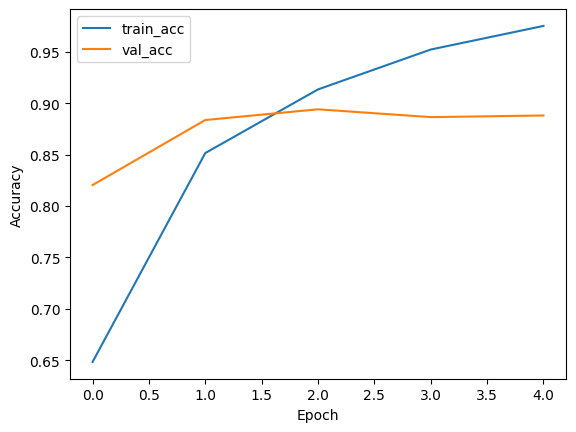

In [10]:
# Evaluating
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

In [11]:
# 📊 Full Metric-Based Evaluation (Place this right after plotting)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

# Predict probabilities and labels
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype('int32')

# Flatten arrays for metric functions
y_test = y_test.flatten()
y_pred = y_pred.flatten()
y_pred_prob = y_pred_prob.flatten()

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)
loss = model.evaluate(x_test, y_test, verbose=0)[0]

# Print nicely formatted report
print("📊 Evaluation Report")
print("============================")
print("Accuracy                 : {:.4f} – Measures overall correctness of predictions".format(acc))
print("Precision                : {:.4f} – Reliability of positive predictions".format(prec))
print("Recall                   : {:.4f} – Ability to detect positive reviews".format(rec))
print("F1-Score                 : {:.4f} – Balances precision and recall".format(f1))
print("AUC-ROC                  : {:.4f} – Measures performance across thresholds".format(auc))
print("Binary Cross-Entropy Loss: {:.4f} – Tracks model fit during training".format(loss))
print("\nConfusion Matrix – Visual overview of predictions:")
print(cm)

782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step
📊 Evaluation Report
Accuracy                 : 0.8812 – Measures overall correctness of predictions
Precision                : 0.8712 – Reliability of positive predictions
Recall                   : 0.8946 – Ability to detect positive reviews
F1-Score                 : 0.8827 – Balances precision and recall
AUC-ROC                  : 0.9524 – Measures performance across thresholds
Binary Cross-Entropy Loss: 0.2844 – Tracks model fit during training

Confusion Matrix – Visual overview of predictions:
[[10846  1654]
 [ 1317 11183]]


In [12]:
# Loading Best Model
model = load_model(MODEL_PATH)

🔍 Inference

In [13]:
def predict_sentiment(text):
    seq = text_to_seq(text)
    prob = model.predict(np.array([seq]))[0][0]
    label = 'Positive' if prob >= 0.5 else 'Negative'
    return label, prob

In [14]:
# Test Samples
samples = [
    "I absolutely loved this film!",
    "Worst movie ever, total waste of time.",
    "The plot was awful and the acting was worse.",
    "A masterpiece, every frame was beautiful.",
    "It was okay, not bad but not great."
]
print("\n--- Inference on Test Set ---")
for s in samples:
    label, conf = predict_sentiment(s)
    print(f"{s[:50]:50s} → {label:10s} (conf={conf:.2f})")


--- Inference on Test Set ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
I absolutely loved this film!                      → Positive   (conf=0.97)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Worst movie ever, total waste of time.             → Negative   (conf=0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
The plot was awful and the acting was worse.       → Negative   (conf=0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
A masterpiece, every frame was beautiful.          → Positive   (conf=0.98)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
It was okay, not bad but not great.                → Negative   (conf=0.44)


# 📋 DOCUMENTATION

---

## 🧪 Methodology

- **Dataset**: IMDB — 25,000 training + 25,000 testing samples, labeled for binary sentiment (Positive / Negative)
- **Text Preprocessing**:
  - Lowercasing
  - HTML tag removal
  - Negation handling (e.g., "not good" → "not_good")
  - Stopword removal
- **CNN Model**:
  - Multiple parallel Conv1D layers with varying kernel sizes for capturing n-grams
- **Loss & Optimizer**:
  - Loss: Binary Cross-Entropy
  - Optimizer: Adam

---

## 🧠 Concepts Used

- **CNN for Sentence Classification**  
  Used 1D convolutional layers with multiple kernel sizes to extract features from text sequences.

- **Text Preprocessing & Sequence Padding**  
  Lowercasing, HTML tag removal, stopword filtering, and sequence padding to fixed input length for model compatibility.

- **Binary Classification with Sigmoid**  
  Final activation function to output probability of positive/negative sentiment.

- **Custom Regex & Negation Handling**  
  Regular expressions applied to preserve negation meaning (e.g., `not good` → `not_good`).

- **Dropout, EarlyStopping for Regularization**  
  Techniques to prevent overfitting during training.

- **Evaluation using scikit-learn Metrics**  
  Used accuracy, precision, recall, F1-score, and AUC-ROC for performance measurement.


---

## ⚠️ Challenges

- **Negation Handling**:
  - Improved accuracy by combining negation words (e.g., `not_good`)
- **Overfitting**:
  - Controlled using `Dropout` and `EarlyStopping`

---

## 🔭 Future Improvements

- Incorporate **GloVe** word embeddings for richer semantic understanding
- Explore **Hybrid Models**:
  - CNN + LSTM  
  - CNN + Attention Mechanism
- Apply **Hyperparameter Tuning** using **Keras Tuner** or similar tools

---

## ✅ Summary

An end-to-end binary sentiment analysis system was developed using a Convolutional Neural Network (CNN) trained on the IMDB dataset. It classifies reviews as either positive or negative using carefully designed preprocessing techniques and modern deep learning practices. The system handles linguistic nuances like negations and uses dropout and early stopping to enhance generalization.